# Proyecto: Análisis Exploratorio de Datos - calidad de vinos

<img src=/work/edawine.png>

Esta notebook es parte de un Proyecto de la [Escuela de Data Science e Inteligencia Artificial de Platzi](https://platzi.com/datos).

Todos los detalles [aquí](https://platzi.com/blog/ejercicio-eda-wine).

Último que cambio

## Instrucciones generales

a) Sigue el paso a paso de cada sección. Para ello tendrás que leer indicaciones para saber qué hacer en cada etapa del EDA.

b) Completa el código en las celdas correspondientes para realizar tu análisis exploratorio de datos (EDA). Por ejemplo, encontrarás código incompleto marcado con guiones bajos (____):


In [1]:
school = 'Platzi'
#print(____) # Incluir la variable declarada anteriormente.

c) Escribe el código que veas conveniente para desarrollar lo que se pida en el EDA. Encontrarás secciones sin ninguna guía de código para que con tu creatividad uses las herramientas que veas necesarias.

d) No te límites. Agrega bloques de código y de Markdown cuando lo necesites.

e) Al final de cada sección encontrarás clases específicas de cursos de Platzi. Recuerda que en esos cursos es donde puedes aprender cómo resolver el proyecto. Puedes consultar las clases de manera directa para resolver tus dudas al momento.

f) También recuerda que puedes tomar todos esos cursos antes o utilizarlos como fuente de consulta:

- [Curso Básico de Python](https://platzi.com/cursos/python/)
- [Curso de Entorno de Trabajo para Ciencia de Datos con Jupyter Notebooks y Anaconda](https://platzi.com/cursos/jupyter-notebook/)
- [Curso de Python Intermedio: Comprehensions, Lambdas y Manejo de Errores](https://platzi.com/cursos/python-intermedio/)
- [Curso de Principios de Visualización de Datos para Business Intelligence](https://platzi.com/cursos/visualizacion-datos/)
- [Curso Básico de Manipulación y Transformación de Datos con Pandas y NumPy](https://platzi.com/cursos/pandas-numpy/)
- [Curso Básico de Visualización de Datos con Matplotlib y Seaborn](https://platzi.com/cursos/matplotlib-seaborn/)
- [Curso de Funciones Matemáticas para Data Science e Inteligencia Artificial](https://platzi.com/cursos/funciones-matematicas/)
- [Curso de Matemáticas para Data Science: Estadística Descriptiva](https://platzi.com/cursos/estadistica-descriptiva/)
- [Curso de Análisis Exploratorio de Datos](https://platzi.com/cursos/analisis-exploratorio-datos/)


## Conoce los datos - Vinho Verde

1. Lee esta información para tener contexto de los datos que se usarán:

Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino rojo del vino portugués "Vinho Verde".

<img src=/work/Large186.jpg>

La fuente de estos datasets son del Machine Learning Repository de UCI. Puedes conocer más de ellos [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Input variables (based on physicochemical tests):
1. fixed acidity / acidez fija
La mayoría de los ácidos involucrados con el vino o fijos o no volátiles (no se evaporan fácilmente).

2. volatile acidity / acidez volátil
La cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre.

3. citric acid / ácido cítrico
Encontrado en pequeñas cantidades el ácido cítrico puede agregar 'frescura' y sabor a los vinos.

4. residual sugar / azúcar residual
La cantidad de azúcar que queda después de que se detiene la fermentación. Es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.

5. chlorides / cloruros
La cantidad de sal en el vino.

6. free sulfur dioxide / dióxido de azufre libre
La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.

7. total sulfur dioxide / dióxido de azufre total
Cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

8. density / densidad
La densidad del agua es cercana a la del agua dependiendo del porcentaje de alcohol y azúcar contenido.

9. pH / pH
Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH

10. sulphates / sulfatos
Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante

11. alcohol / alcohol
El porcentaje de contenido de alcohol del vino

Output variable (based on sensory data):

12. quality / calidad
Variable de salida o target (basada en datos sensoriales, puntuación entre 0 y 10). Indica qué tan bueno es el vino en este estándar de calidad.

## Importar librerías

1. Ejecuta la siguiente celda para importar librerías.

Estas son las librerías de Python esenciales para ejecutar tu EDA. Mientras desarrolles el proyecto puedes agregar las que veas conveninente. 

Puedes usar cualquiera que conozcas del lenguaje Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# agrega librerías que necesites

### *Clases sugeridas*:

- [Google Colab: primeros pasos](https://platzi.com/clases/2434-jupyter-notebook/40386-google-colab-primeros-pasos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Google Colab: ciencia de datos](https://platzi.com/clases/2434-jupyter-notebook/40387-google-colab-ciencia-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Utiliza Deepnote](https://platzi.com/clases/2434-jupyter-notebook/40388-utilizar-deepnote/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Carga de datos

1. Carga los datasets directo de sus URL como se muestran en la siguiente celda.

Nota: alternativamente podríamos cargar los datos con los archivos csv, pero con las URL los podemos tener de forma más directa desde la fuente.

In [3]:
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

2. Utiliza Pandas para crear tus DataFrames utilizando las dos variables que creaste para cargar los datos. 

Toma en cuenta que el delimiter de los archivos csv es `;`

In [4]:
red = pd.read_csv(url_wine_red, delimiter=";")
white = pd.read_csv(url_wine_white, delimiter=";")

3. Carga las primeras 5 filas de ambos DataFrames.

In [5]:
red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### *Clases sugeridas*:

- [Series y DataFrames en Pandas](https://platzi.com/clases/2912-pandas-numpy/47984-series-y-dataframes-en-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Leer archivos CSV y JSON con Pandas](https://platzi.com/clases/2912-pandas-numpy/47985-leer-archivos-csv-y-json-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Combina ambos DataFrames

1. Incluye una variable llamada `category` a cada DataFrame que indiqué si el vino es rojo (red) o blanco (white). Esto servirá para distinguir el tipo de vino de cada fila/registro al unir los DataFrames.

In [7]:
red['category']='red'
white['category']='white'

In [8]:
red.shape

(1599, 13)

In [9]:
white.shape

(4898, 13)

2. Utiliza Pandas para unir ambos registros de los dos DataFrames.

In [10]:
total_wine=red.append(white, ignore_index=True)

In [11]:
total_wine.shape

(6497, 13)

3. Comprueba que el DataFrame este completo viendo sus primeras filas. Ve que la columna category esté con los datos correctos.

In [12]:
total_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### *Clases sugeridas*:

- [Agregar o eliminar datos con Pandas](https://platzi.com/clases/2912-pandas-numpy/47987-agregar-o-eliminar-datos-con-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Exploración inicial de los datos y validación

1. Consigue la cantidad de filas y columnas del DataFrame.

In [13]:
total_wine.shape

(6497, 13)

2. Conoce los tipos de datos de cada característica/variable y si tienen valores nulos.

In [14]:
total_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
category                 object
dtype: object

In [15]:
total_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
category                0
dtype: int64

No existen valores nulos.

3. Cálcula las estadísticas descriptivas del dataset. Observa a detalle las estadísticas e identifica si existen diferencias altas entre cada percentil y en los percentilees extremos con valores máximos y mínimos de cada característica/variable.

In [16]:
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Para la variable fixed acidity sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una mayor diferencia entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

Para la volatile acidity sí existe una diferencia importante entre el percentil 25% y el valor mínimo, pero existe una diferencia mucho mayor entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

Para la variable citric acidity sí existe una diferencia importante entre el percentil 25% y el valor mínimo, pero existe una mayor diferencia entre el percentil 75% y el valor máximo. La media es mayor que el percentil 50%.

Para la variable residual sugar sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia muy grande entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

Para la variable chlorides sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia muy grande entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

Para la variable free sulfur sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia muy grande entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

Para la variable total sulfure sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia muy grande entre el percentil 75% y el valor máximo. Además, la media es menor que el percentil 50%.

Para la variable density sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia muy grande entre el percentil 75% y el valor máximo. Además, la media es menor que el percentil 50%.

Para la variable pH sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia entre el percentil 75% y el valor máximo. Además, la media es menor que el percentil 50%.

Para la variable sulphates sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia entre el percentil 75% y el valor máximo. Además, la media es menor que el percentil 50%.

Para la variable alcohol sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia entre el percentil 75% y el valor máximo. Además, la media es menor que el percentil 50%.

Para la variable sulphates sí existe una diferencia importante entre el percentil 25%  y el valor mínimo, pero existe una diferencia entre el percentil 75% y el valor máximo. Además, la media es mayor que el percentil 50%.

4. Crea una variable donde almacenarás los valores de la columna `quality`. Revisa sus estadísticas descriptivas principales.

In [17]:
quality = total_wine['quality']
quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

5. Cuenta los valores únicos de la variable `quality`. Para visualizar cómo se comporta e identificar si es una variable discreta o continua.

In [18]:
quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Quality es una variable discreta.

6. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

El Data Frame total_wine está formado por una 13 columnas y 6497 filas. El tipo de todas las variables es float, a excepción de qualityque es int64 y de category que es object. No existen valores nulos en el Data Frame. Al explorar las estadísticas descriptivas de las variables podemos concluir que hay varios outliers en estas. La media de la variable quality es 5.818 con una desviación de 0.873. La variable quality puede tomar los valores enteros de 3,4,5,6,7,8 y 9.

### *Clases sugeridas*:

- [Shape y Reshape](https://platzi.com/clases/2912-pandas-numpy/47979-shape-y-reshape/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Funciones principales de Pandas](https://platzi.com/clases/2912-pandas-numpy/47990-funciones-principales-de-pandas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central](https://platzi.com/clases/2353-estadistica-descriptiva/38396-medidas-de-tendencia-central/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Medidas de tendencia central en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38398-medidas-de-tendencia-central-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Categorización de la variable target

En la sección anterior pudiste observar que la variable `quality` es categórica en naturaleza. Crear categorías de calidad nos ayudará a entender mejor cómo se comporta la calidad en los vinos.

En esta sección entenderás mejor la razón de esto y lo ejecutarás.

1. Crea una gráfica tipo countplot de la variable `quality` para ver la cantidad de cada valor de calidad.

Text(0.5, 1.0, 'Histograma de quality')

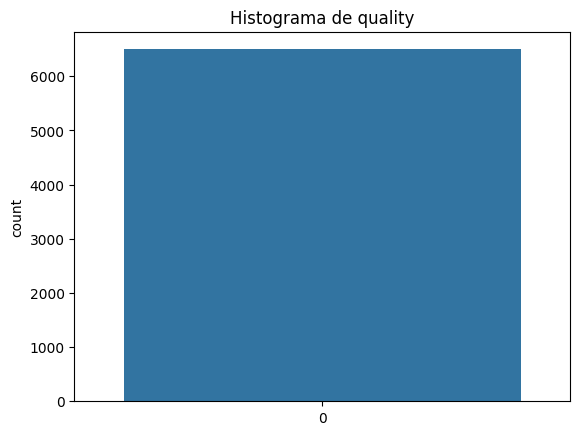

In [19]:
countplot_quality = sns.countplot(quality)
countplot_quality.set_title('Histograma de quality')


Con la visualización anterior es mucho más sencillo de observar cómo se categorizan los valores de calidad en 3 grupos principales (baja, media y alta). 

2. Completa la siguiente función lambda con las condiciones necesarias para agregar una columna al DataFrame donde se indique la categoría de calidad: 'Poor', 'Medium', 'High'. Para ello deberás definir el criterio de rango de valores de cada categoría de acuerdo a lo que observaste en la gráfica anterior.

A los vinos que tienen calidad 3, 4 y 5 vamos a asignarles la categoría de calidad 'Poor'. A los vinos con calidad 6 vamos a asignarles la categoría de calidad 'Medium'. Finalmente, a los vinos cuya calidad es 7, 8 y 9 les asignaremos la categoría de calidad 'High'.

In [20]:
def calidad(x):
    #if x == 3 or x == 4:
    if x == 3 or x == 4 or x == 5:
        return ('Poor')
    #elif  x == 5 or x == 6 or x == 7:
    elif x == 6:
        return ('Medium')
    else:
        return ('High')

total_wine['quality_category'] = total_wine['quality'].apply(lambda x: calidad(x))

2.1 Redefine el tipo de variable de la nueva columna como tipo 'category'.

In [21]:
total_wine.quality_category = total_wine.quality_category.astype('category')
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

3. Crea una gráfica para visualizar el conteo de datos en cada una de las categorías de calidad del vino.

In [22]:
countplot_quality_category=sns.countplot(total_wine['quality_category'],order=['Poor','Medium','High'])
countplot_quality_category.set_title('Histograma de quality category')


ValueError: Input data must be a pandas object to reorder

4. Escribe tus observaciones de cada uno de los pasos anteriores de esta sección:

Si analizamos la figura del Histograma de quality podemos observar que la mayoría de los vinos tienen calidad 5, 6, 7. La mayor parte de los vinos caen en la categoría 6. Mientras que las categorías 3, 4, 8 y 9 son las que menos vinos tienen.
Al analizar el Histograma de quality category podemos observar que la mayor cantidad de vinos corresponden a Medium,  seguido por Poor, mientras que hay menos vinos con quality category High.

### *Clases sugeridas*:

Gráficas

- [Set (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47947-set/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Apply, lambdas, conversión de datos

- [Funciones anónimas: lambdas](https://platzi.com/clases/2255-python-intermedio/36465-funciones-anonimas-lambda/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Apply (Pandas)](https://platzi.com/clases/2912-pandas-numpy/47996-apply/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Tipos de datos (NumPy y Pandas)](https://platzi.com/clases/2912-pandas-numpy/47976-tipos-de-datos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Manejo de outliers

En una sección anterior tuviste una pista de qué existen outliers en el dataset. 

1. Utiliza el método que veas más conveniente para detectar outliers en tu dataset. Por ejemplo, boxplots, método IQR, etc.

Para detectar los outliers en el dataset vamos a realizar los boxplots de cada una de las variables. También realizaremos el boxplot de cada variable, pero separando los datos del vino según su categoría de calidad (quality category). Es decir, tendremos tres gráficos para cada variable.
El primer gráfico será el histograma correspondiente a la variable, el segundo gráfico será el boxplot de la variable y el último gráfico estará compuesto por tres boxplot de la variable, cada uno corresponde a una categoría de calidad distinta, es decir uno para Poor, uno para Medium y uno para High. De estamanera será más fácil observar los outliers de cada variable.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

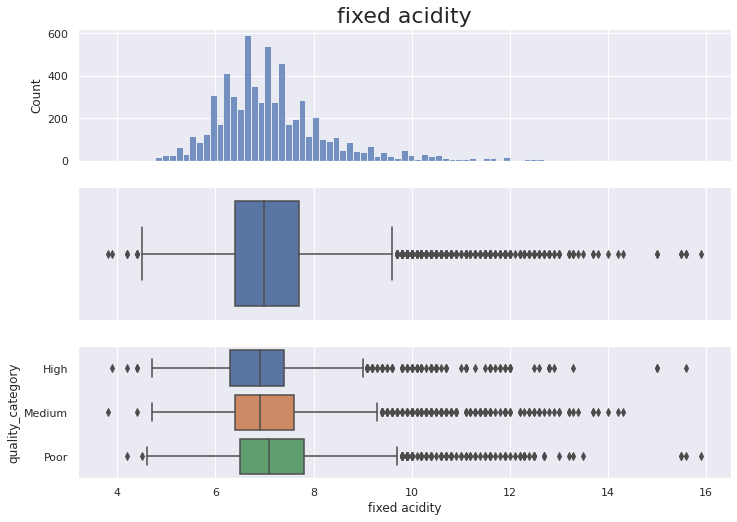

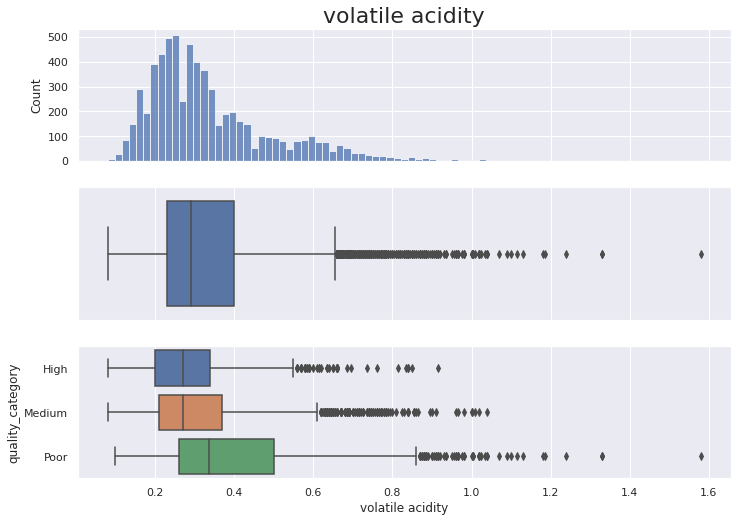

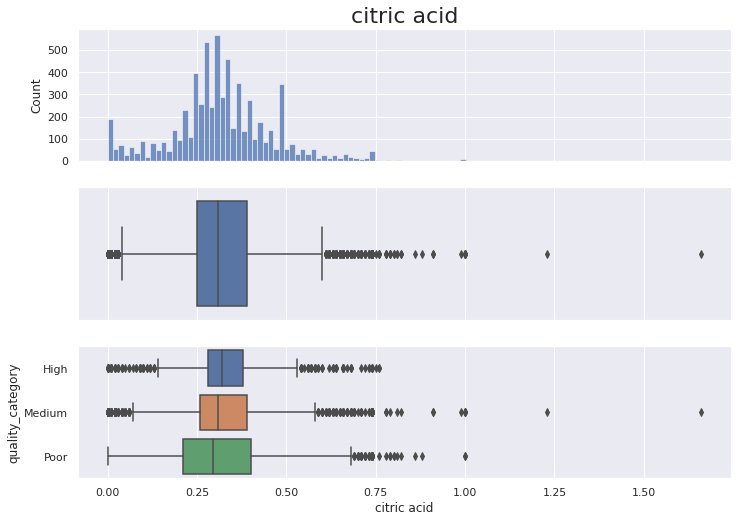

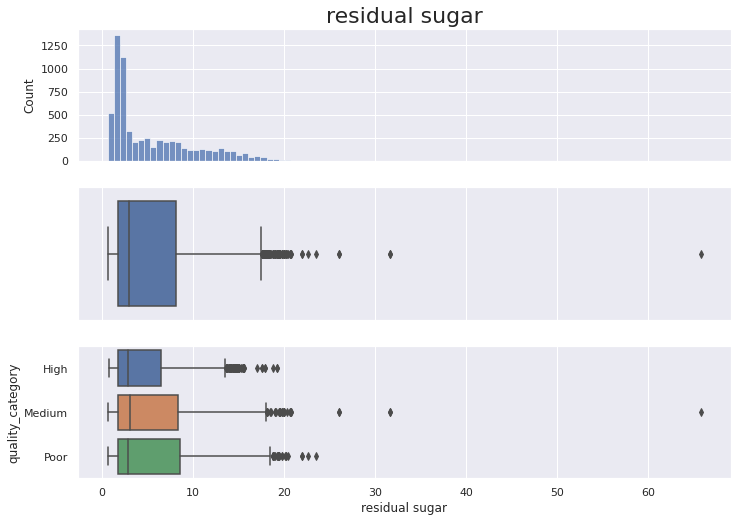

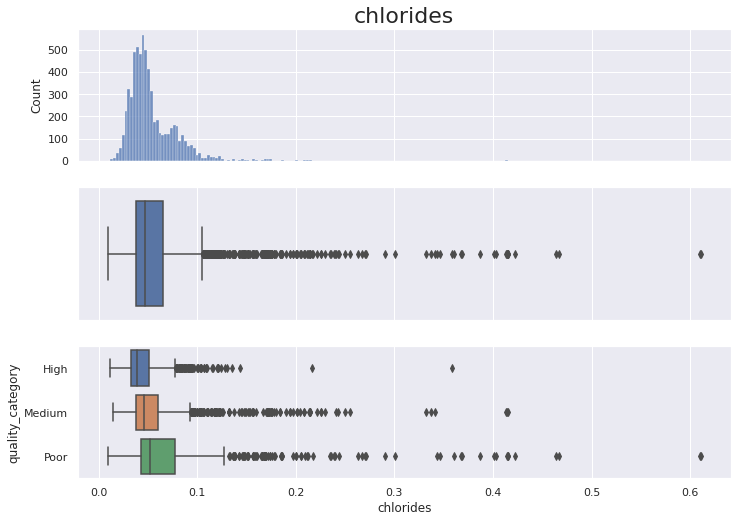

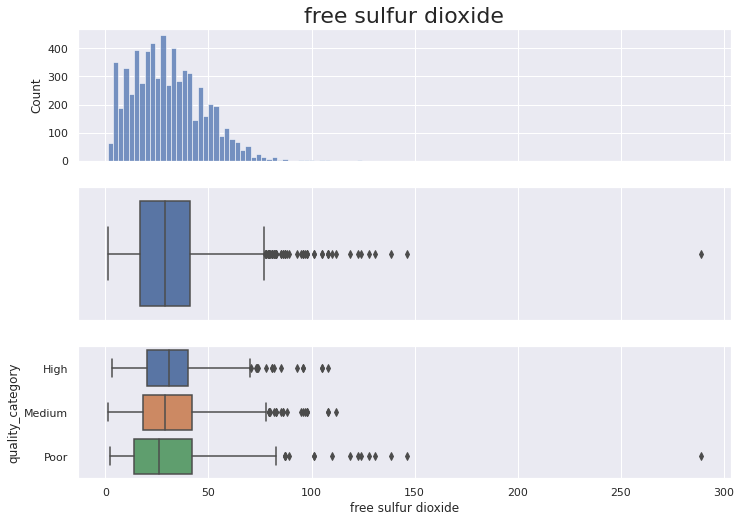

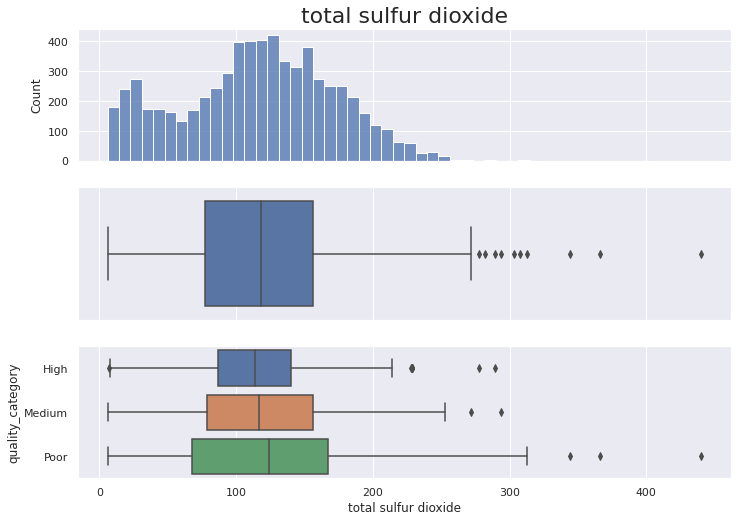

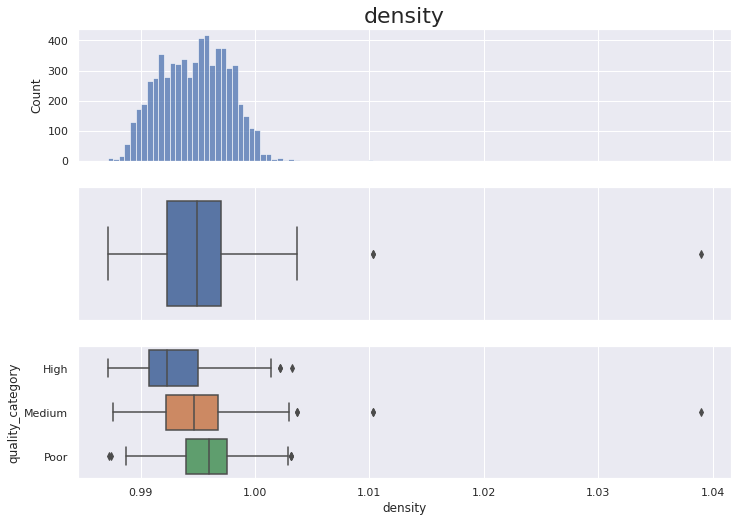

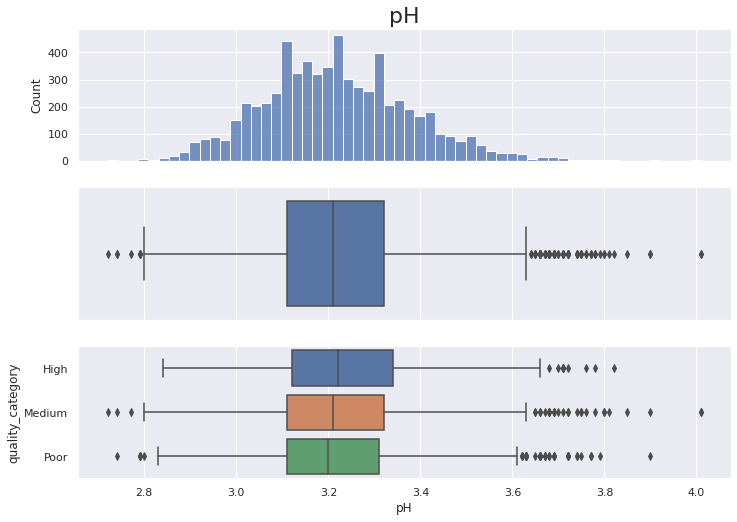

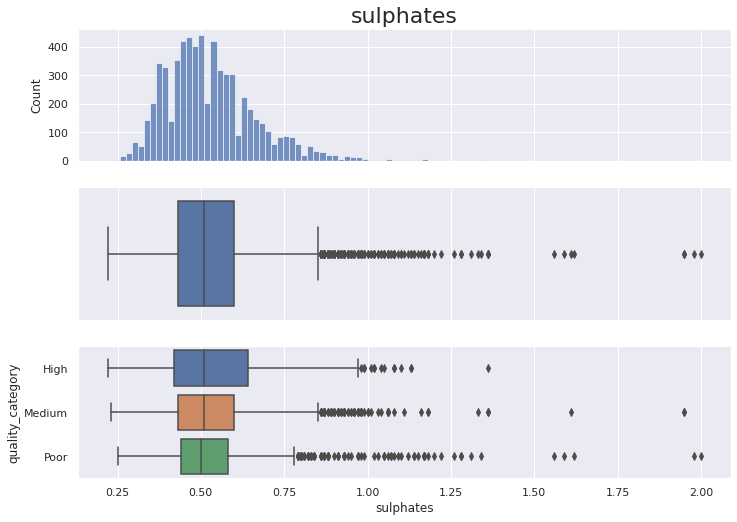

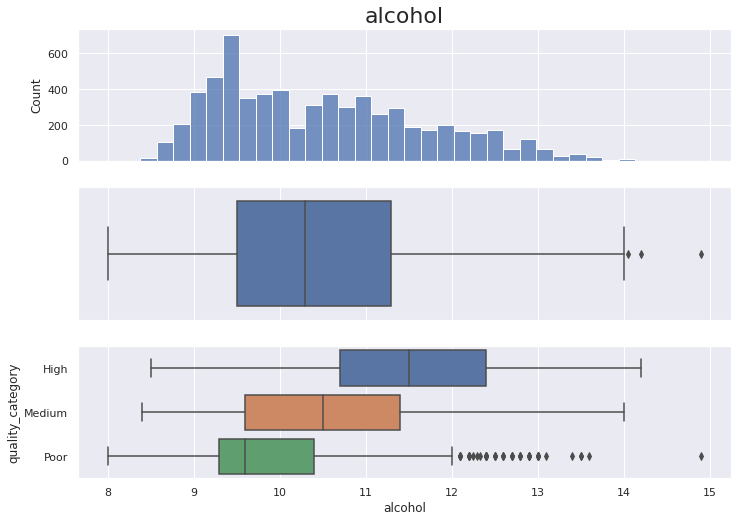

In [ ]:
for i in range(11):    
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    f, (ax_hist,ax_boxt, ax_box) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.5, .5,.5)})
    sns.histplot(total_wine.iloc[:,i], ax=ax_hist)
    sns.boxplot(total_wine.iloc[:,i],ax=ax_boxt)
    sns.boxplot(x=total_wine.iloc[:,i], y='quality_category',data=total_wine,ax=ax_box)
    ax_hist.set_title(total_wine.iloc[:,i].name, size=22)
    ax_boxt.set(xlabel='')
    

Podemos observar en los gráficos que los outliers para las variables con los datos totales no son los mismos que los outliers que se detectan para las variables separando las categorías de calidad de vino Poor, Medium y High.

2. Responde la siguiente pregunta:

a) ¿Ves necesario eliminar estos outliers?

b) ¿Por qué?

Sí es necesario eliminar los outliers.Porque pueden alterar las correlaciones entre las variables pues son datos atípicos.Sin embargo, veo necesario eliminarlos tomando en cuenta la categoría de calidad del vino. Pues si sólo se eliminan los outliers generales de la categoría, en muchos casos no se van a eliminar datos que pueden afectar la relación entre las variables y la calidad del vino.

3. Elimina los outliers de ser necesario en la siguiente celda.

Se eliminarán los outliers para cada una de las variables tomando en cuenta la categoría de calidad, es decir Poor,Medium y High.

Primero eliminanos los outliers correspondientes a la categoría de calidad Poor.

In [ ]:
total_wine_poor_or = total_wine[total_wine.quality_category=='Poor']
total_wine_poor_or = total_wine_poor_or.reset_index(drop=True)
total_wine_poor_or['New_ID'] = total_wine_poor_or.index + 1

In [ ]:
total_wine_poor = total_wine[total_wine.quality_category=='Poor']
total_wine_poor = total_wine_poor.reset_index(drop=True)
total_wine_poor['New_ID'] = total_wine_poor.index + 1
t_w_c= []
for i in range (11):
    Q1 = total_wine_poor.iloc[:,i].quantile(q=0.25)
    Q3 = total_wine_poor.iloc[:,i].quantile(q=0.75)
    iqr = Q3 - Q1
    minlimit = Q1 - 1.5*iqr
    maxlimit = Q3 + 1.5*iqr
    
    total_wine_filteredpoor = total_wine_poor[(total_wine_poor.iloc[:,i] < maxlimit) & (total_wine_poor.iloc[:,i] > minlimit)]
    t_w_c.append(total_wine_filteredpoor['New_ID']) 
    #total_wine_poor=total_wine_filteredpoor

In [ ]:
identidad=(pd.DataFrame(t_w_c[0:11])).T
identidad1=identidad.dropna()
identidadf=identidad1.iloc[:,0]

In [ ]:
total_wine_poor_wo = total_wine_poor_or[total_wine_poor_or.New_ID.isin(identidadf)]


Realizamos el mismo proceso para la categoría de calidad Medium.

In [ ]:
total_wine_medium_or = total_wine[total_wine.quality_category=='Medium']
total_wine_medium_or = total_wine_medium_or.reset_index(drop=True)
total_wine_medium_or['New_ID'] = total_wine_medium_or.index + 1

In [ ]:
total_wine_medium = total_wine[total_wine.quality_category=='Medium']
total_wine_medium = total_wine_medium.reset_index(drop=True)
total_wine_medium['New_ID'] = total_wine_medium.index + 1
t_w_c_m= []
for i in range (11):
    Q1 = total_wine_medium.iloc[:,i].quantile(q=0.25)
    Q3 = total_wine_medium.iloc[:,i].quantile(q=0.75)
    iqr = Q3 - Q1
    minlimit = Q1 - 1.5*iqr
    maxlimit = Q3 + 1.5*iqr
    
    total_wine_filteredmedium = total_wine_medium[(total_wine_medium.iloc[:,i] < maxlimit) & (total_wine_medium.iloc[:,i] > minlimit)]
    t_w_c_m.append(total_wine_filteredmedium['New_ID']) 

In [ ]:
identidadm=(pd.DataFrame(t_w_c_m[0:11])).T
identidad1m=identidadm.dropna()
identidadfm=identidad1m.iloc[:,0]

In [ ]:
total_wine_medium_wo = total_wine_medium_or[total_wine_medium_or.New_ID.isin(identidadfm)]

Realizamos el mismo proceso para la categoría de calidad High.

In [ ]:
total_wine_high_or = total_wine[total_wine.quality_category=='High']
total_wine_high_or = total_wine_high_or.reset_index(drop=True)
total_wine_high_or['New_ID'] = total_wine_high_or.index + 1

In [ ]:
total_wine_high = total_wine[total_wine.quality_category=='High']
total_wine_high = total_wine_high.reset_index(drop=True)
total_wine_high['New_ID'] = total_wine_high.index + 1
t_w_c_h= []
for i in range (11):
    Q1 = total_wine_high.iloc[:,i].quantile(q=0.25)
    Q3 = total_wine_high.iloc[:,i].quantile(q=0.75)
    iqr = Q3 - Q1
    minlimit = Q1 - 1.5*iqr
    maxlimit = Q3 + 1.5*iqr
    
    total_wine_filteredhigh = total_wine_high[(total_wine_high.iloc[:,i] < maxlimit) & (total_wine_high.iloc[:,i] > minlimit)]
    t_w_c_h.append(total_wine_filteredhigh['New_ID']) 

In [ ]:
identidadh=(pd.DataFrame(t_w_c_h[0:11])).T
identidad1h=identidadh.dropna()
identidadfh=identidad1h.iloc[:,0]

In [ ]:
total_wine_high_wo = total_wine_high_or[total_wine_high_or.New_ID.isin(identidadfh)]

Unimos los datos en un data set que tendrá el total de los datos para los vinos blancos y rojos.

In [ ]:
total_wine_final=total_wine_poor_wo.append(total_wine_medium_wo).append(total_wine_high_wo)
total_wine_final=total_wine_final.reset_index(drop=True)


Vamos a graficar nuevamente los histogramas de cada variable para ver como los outliers fueron eliminados. También se graficarán los boxplot con outliers y sin outliers para apreciar cómo se elimaron los outliers.
Es decir, tendremos tres gráficos para cada variable. Los tres primeros gráficos corresponden a los datos sin outliers. El primer gráfico será el histograma correspondiente a la variable, el segundo gráfico será el boxplot de la variable y el último gráfico estará compuesto por tres boxplot de la variable, cada uno corresponde a una categoría de calidad distinta, es decir uno para Poor, uno para Medium y uno para High. Por último, el cuarto gráfico será con los datos que aún tienen outliers, esté gráfico tendrá los boxplot de las variables para Poor, Medium y High  Así se podrá observar como se eliminaron los outliers de cada variable.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

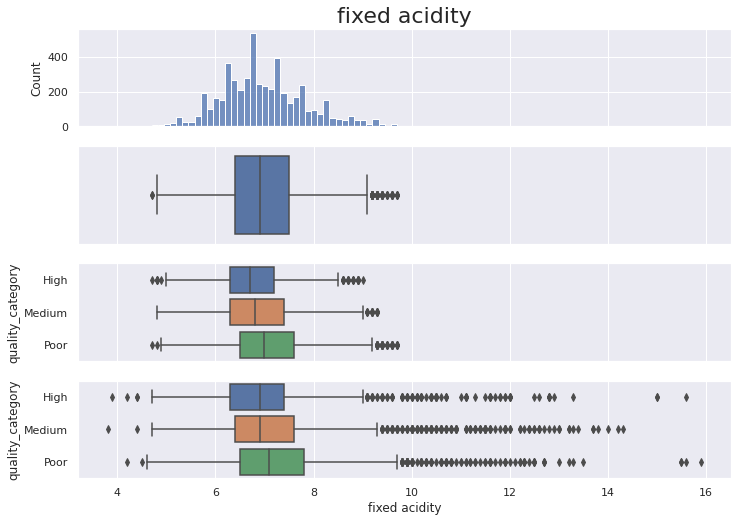

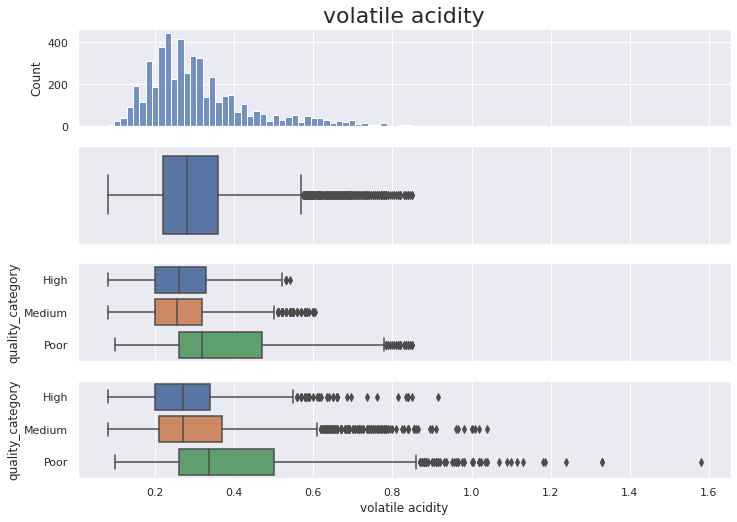

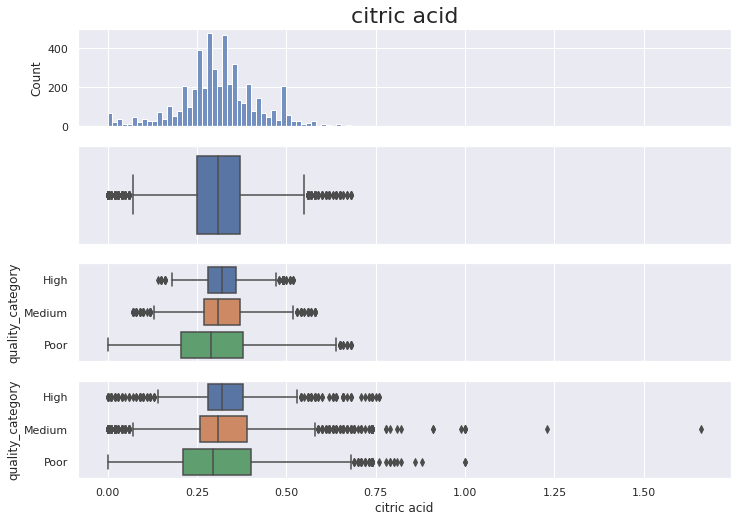

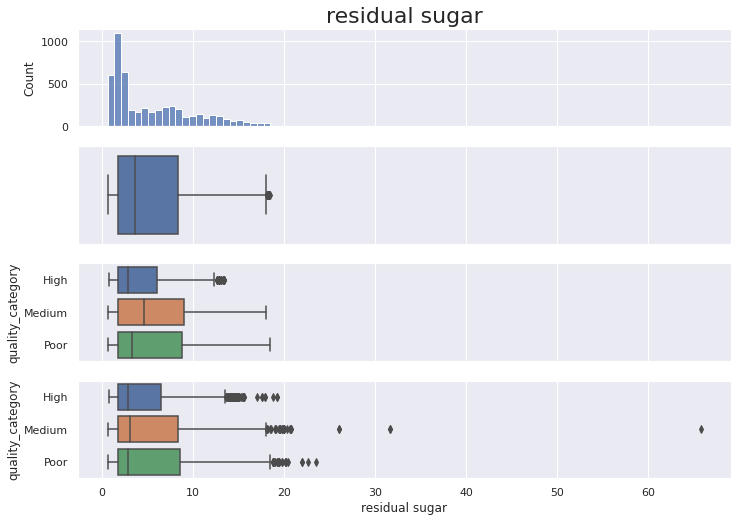

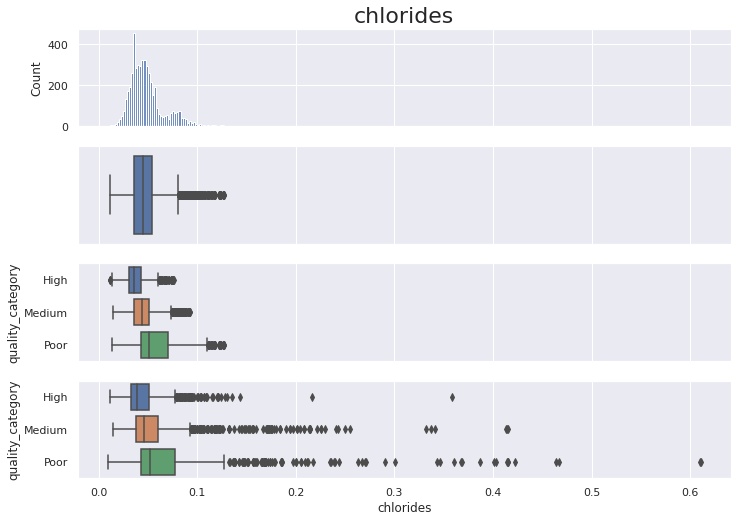

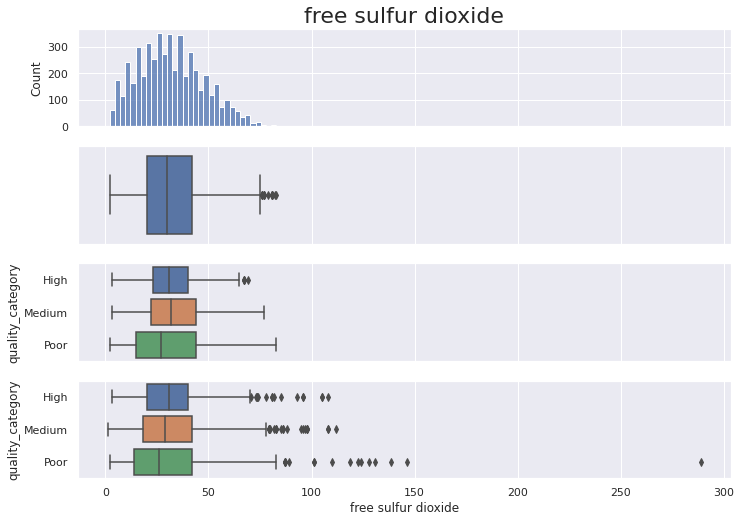

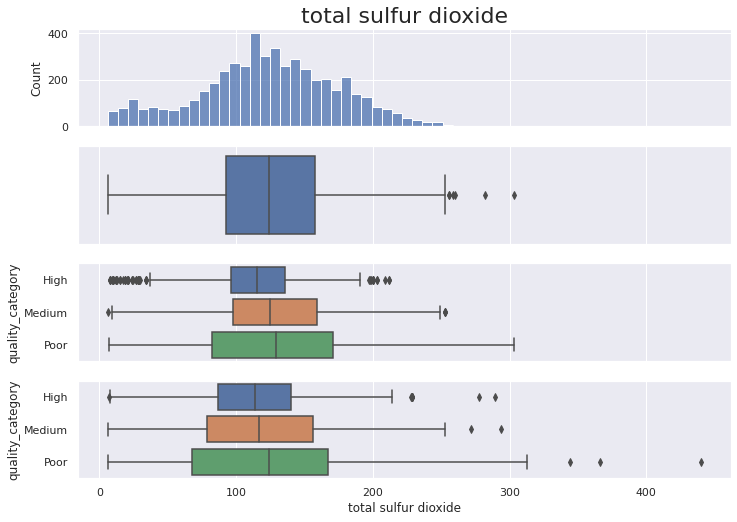

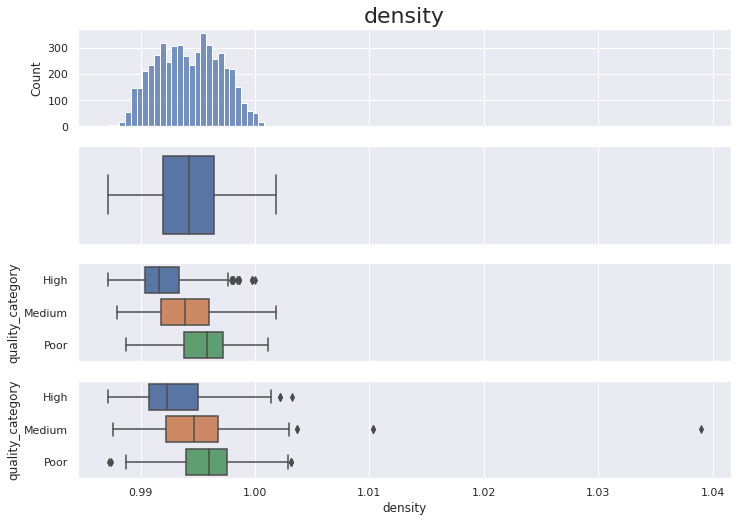

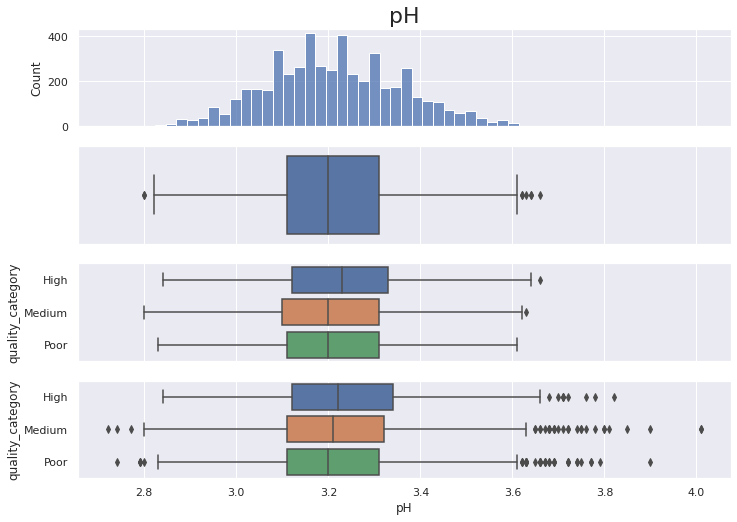

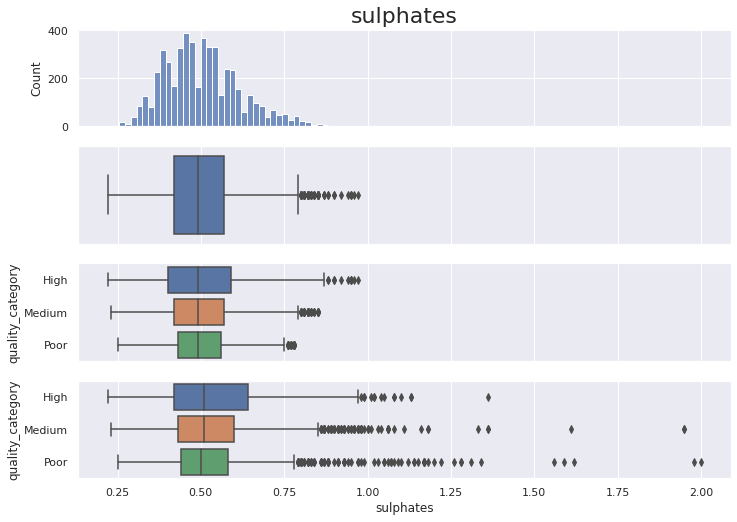

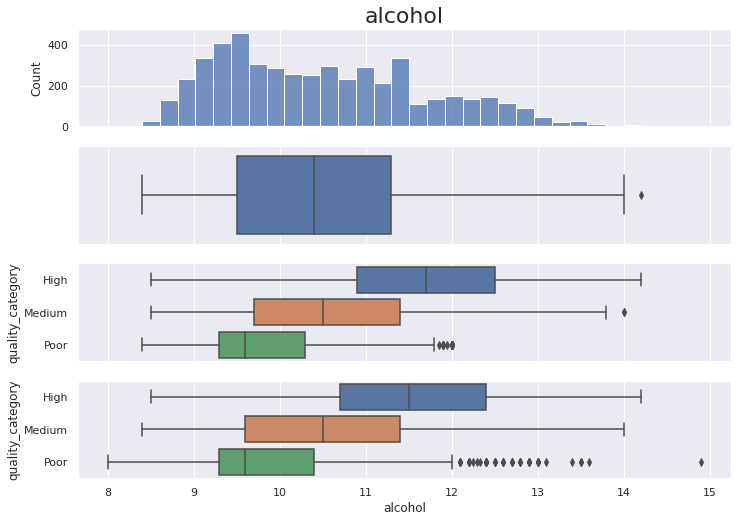

In [ ]:
for i in range(11):    
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    f, (ax_hist,ax_boxt, ax_box,ax_boxo) = plt.subplots(4, sharex=True, gridspec_kw={"height_ratios": (.5,.5, .5,.5)})
    sns.histplot(total_wine_final.iloc[:,i], ax=ax_hist)
    sns.boxplot(total_wine_final.iloc[:,i],ax=ax_boxt)
    sns.boxplot(x=total_wine_final.iloc[:,i], y='quality_category',data=total_wine_final,ax=ax_box)
    sns.boxplot(x=total_wine.iloc[:,i], y='quality_category',data=total_wine,ax=ax_boxo)
    ax_boxt.set(xlabel='')
    ax_box.set(xlabel='')
    ax_hist.set_title(total_wine.iloc[:,i].name, size=22)

### *Clases sugeridas*:

Estadística descriptiva
- [Medidas de dispersión](https://platzi.com/clases/2353-estadistica-descriptiva/38399-medidas-de-dispersion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Desviación estándar](https://platzi.com/clases/2353-estadistica-descriptiva/38400-desviacion-estandar/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Medidas de dispersión en Python](https://platzi.com/clases/2353-estadistica-descriptiva/38401-medidas-de-dispersion-en-python/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas boxplots
- [Crear otro tipo de gráficas (Boxplot en Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47945-crear-otro-tipo-de-graficas/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)
- [Categóricos (Boxplot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Análisis de correlación entre variables

Ya que conociste el comportamiento esencial de las características y la variable `quality` es momento de conocer cómo se relacionan entre sí para descubrir si alguna(s) pueden afectar a esta calidad.

1. Crea una matriz de correlación de las variables numéricas del dataset.

In [ ]:
correlation_matriz=total_wine_final.drop(['New_ID'],axis=1).corr()
correlation_matriz

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.191776,0.185536,-0.049487,0.303733,-0.171786,-0.149376,0.343798,-0.228578,0.119132,-0.125535,-0.156714
volatile acidity,0.191776,1.000000,-0.410046,-0.137676,0.525480,-0.301014,-0.322429,0.254783,0.209521,0.152384,-0.107298,-0.312310
citric acid,0.185536,-0.410046,1.000000,0.144862,-0.195566,0.201597,0.265214,-0.001986,-0.235378,-0.007377,0.048286,0.132551
residual sugar,-0.049487,-0.137676,0.144862,1.000000,-0.069547,0.421677,0.472894,0.634570,-0.241381,-0.133477,-0.381595,-0.089730
chlorides,0.303733,0.525480,-0.195566,-0.069547,1.000000,-0.199475,-0.255066,0.525604,0.223752,0.285243,-0.420136,-0.379334
free sulfur dioxide,-0.171786,-0.301014,0.201597,0.421677,-0.199475,1.000000,0.688110,0.147646,-0.149746,-0.090650,-0.173920,0.079050
total sulfur dioxide,-0.149376,-0.322429,0.265214,0.472894,-0.255066,0.688110,1.000000,0.189719,-0.217485,-0.140357,-0.275230,-0.040332
density,0.343798,0.254783,-0.001986,0.634570,0.525604,0.147646,0.189719,1.000000,0.084854,0.188715,-0.784005,-0.425881
pH,-0.228578,0.209521,-0.235378,-0.241381,0.223752,-0.149746,-0.217485,0.084854,1.000000,0.271690,0.027151,0.024231
sulphates,0.119132,0.152384,-0.007377,-0.133477,0.285243,-0.090650,-0.140357,0.188715,0.271690,1.000000,-0.040192,0.025237


2. Crea una gráfica tipo heatmap para observar mejor las correlaciones entre variables. 

<AxesSubplot:>

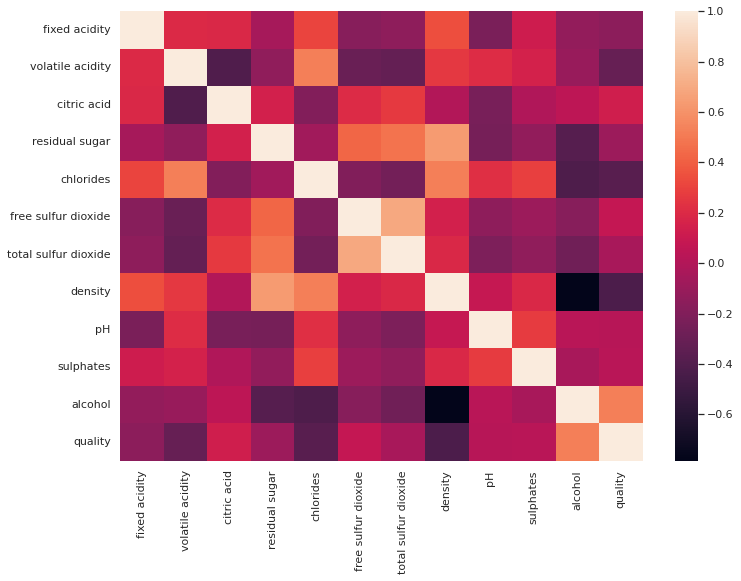

In [ ]:
sns.heatmap(correlation_matriz)

3. Muestra una tabla con los valores de correlación de cada variable con la variable `quality`.

In [ ]:
correlation_matriz['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.522102
citric acid             0.132551
free sulfur dioxide     0.079050
sulphates               0.025237
pH                      0.024231
total sulfur dioxide   -0.040332
residual sugar         -0.089730
fixed acidity          -0.156714
volatile acidity       -0.312310
chlorides              -0.379334
density                -0.425881
Name: quality, dtype: float64

4. Responde las siguientes preguntas:

a) ¿Existen variables que tengan correlación positiva con la variable `quality`? ¿Cuáles son?

Sí, el alcohol tiene correlación positiva con la variable quality.

b) ¿Existen variables que tengan correlación negativa con la variable `quality`? ¿Cuáles son?

Sí, las variables que tienen correlación negativa con la variable quality son: density, chlorides, volatile acidity.

Las variables que más correlación tienen con la calidad son:

a) Positivamente:
- alcohol
b) Negativamente:
- density
- chlorides
- volatile aciddity

5. Crea las gráficas que consideres para ver la correlación que exista entre las variables que encontraste que tienen mayor correlación con la variable `quality`.

In [ ]:
correlated_quality=total_wine_final[['alcohol','density','chlorides','volatile acidity','quality_category','category']]

In [ ]:
correlation_matriz_quality=correlated_quality.corr()
correlation_matriz_quality

,alcohol,density,chlorides,volatile acidity
alcohol,1.000000,-0.784005,-0.420136,-0.107298
density,-0.784005,1.000000,0.525604,0.254783
chlorides,-0.420136,0.525604,1.000000,0.525480
volatile acidity,-0.107298,0.254783,0.525480,1.000000


<AxesSubplot:>

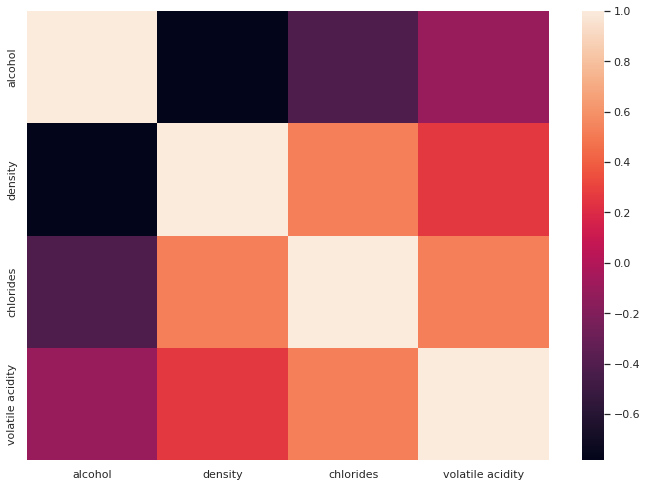

In [ ]:
sns.heatmap(correlation_matriz_quality)

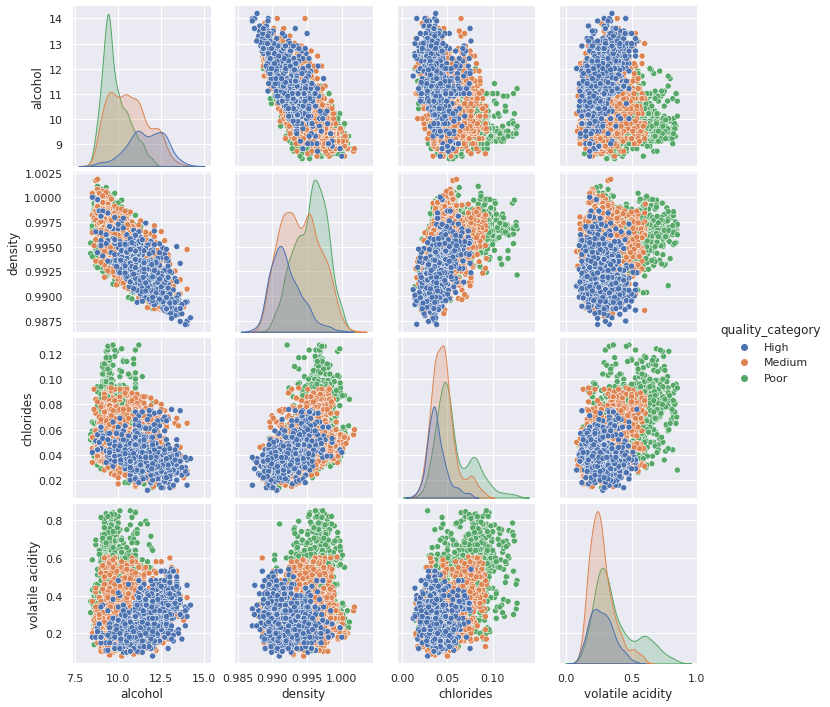

In [ ]:
sns.pairplot(correlated_quality,hue='quality_category')

6. Responde las preguntas: 

a) ¿Existen variables correlacionadas con la calidad que estén correlacionadas fuertemente entre sí?

b) ¿Esta información para que nos serviría?

Sí existen variables que están fuertemente correlacionadas. Por ejemplo, chlorides está correlacionada fuertemente de manera positiva con volatile acidity y con density. Por otro lado, alcohol y density están correlacionadas fuertemente de manera negativa.

Esta información nos podría servir para realizar una reducción de variables. Así podríamos manejar más fácilmente los datos.

7. Crea gráficas de barras y de violín para ver a detalle cómo las variables que tienen correlación más fuerte con la variable `quality`, afectan a dicha variable.

- En el eje x deberán aparecer las categorías de calidad: Poor, Medium High.

- En el eje y deberá aparecer la variable correspondiente.

- Toma en cuenta los valores máximo y mínimo de cada variable para marcar los límites en el eje y.

Al finalizar obtendrás gráficas como estas:

<img src=/work/density.png>
<img src=/work/density_violin.png>


(7.0, 13.0)

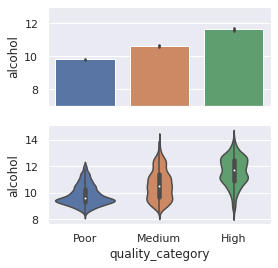

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
f, (ax_bar,ax_vio) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6,.6)})
sns.barplot(x='quality_category', y='alcohol', data=total_wine_final, ax=ax_bar,order=['Poor','Medium','High'])
sns.violinplot(x='quality_category', y='alcohol',data=total_wine_final,ax=ax_vio,order=['Poor','Medium','High'])
ax_bar.set(xlabel='')
ax_bar.set_ylim(7,13)

(0.99, 0.999)

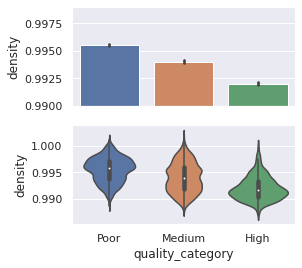

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
f, (ax_bar,ax_vio) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6,.6)})
sns.barplot(x='quality_category', y='density', data=total_wine_final, ax=ax_bar,order=['Poor','Medium','High'])
sns.violinplot(x='quality_category', y='density',data=total_wine_final,ax=ax_vio,order=['Poor','Medium','High'])
ax_bar.set(xlabel='')
ax_bar.set_ylim(0.990,0.999)

(0.02, 0.07)

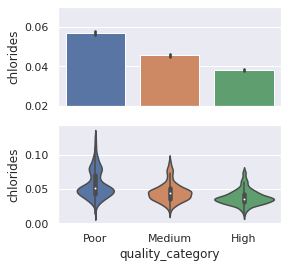

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
f, (ax_bar,ax_vio) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6,.6)})
sns.barplot(x='quality_category', y='chlorides', data=total_wine_final, ax=ax_bar,order=['Poor','Medium','High'])
sns.violinplot(x='quality_category', y='chlorides',data=total_wine_final,ax=ax_vio,order=['Poor','Medium','High'])
ax_bar.set(xlabel='')
ax_bar.set_ylim(0.02,0.07)

(0.1, 0.5)

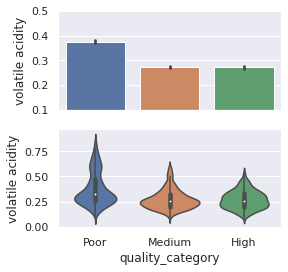

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
f, (ax_bar,ax_vio) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6,.6)})
sns.barplot(x='quality_category', y='volatile acidity', data=total_wine_final, ax=ax_bar,order=['Poor','Medium','High'])
sns.violinplot(x='quality_category', y='volatile acidity',data=total_wine_final,ax=ax_vio,order=['Poor','Medium','High'])
ax_bar.set(xlabel='')
ax_bar.set_ylim(0.1,0.5)

8. Responde las siguientes preguntas como conclusiones de este EDA:

a) ¿Cuáles son las variables que podrían afectarían a la calidad del vino?

b) ¿Es necesario aumentar o disminuir la cantidad de dichas variables para aumentar la calidad?

c) ¿Cuál es la variable que más podría afectar a la calidad del vino?

a)Las variables que podrían afectar la calidad del vino son: alcohol, density, chlorides y height ratios.

b)Si aumentamos la variable alcohol aumenta la calidad del vino.
Si disminuimos la variable density la calidad del vino aumenta.
Si disminuimos la variable chlorides la calidad del vino aumenta.
Si disminuimos la variable volatile acidity la calidad del vino aumenta.

c)El alcohol es la variable que más podría afectar a la calidad del vino.

### *Clases sugeridas*:

Estadística descriptiva y EDA
- [Correlaciones](https://platzi.com/clases/2353-estadistica-descriptiva/38409-correlaciones/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Matriz de covarianza](https://platzi.com/clases/2353-estadistica-descriptiva/38410-matriz-de-covarianza/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Correlación](https://platzi.com/clases/2178-analisis-exploratorio-datos/34151-correlacion/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

Gráficas
- [Relation (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47951-relation/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Heatmap (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47953-heatmap/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Jointplot y Pairplot (Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47952-jointplot-y-pairplot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Bar Plot (Matplotlib)](https://platzi.com/clases/2913-matplotlib-seaborn/47944-bar-plot/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

- [Categóricos (Violin plot en Seaborn)](https://platzi.com/clases/2913-matplotlib-seaborn/47950-categoricos/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda)

## Siguientes pasos 🚀

---

¡Muchas felicidades! Has creado tu primer proyecto de análisis exploratorio de datos.

Es importante que recuerdes que dentro del análisis exploratorio de datos hay múltiples caminos y herramientas de acuerdo a lo que quieras lograr. Podríamos ir más allá en la manipulación y análisis de datos. Incluso podríamos utilizar machine learning para validar nuestra hipótesis.

En este momento ya tienes **el primer proyecto para tu portafolio profesional**. Para seguir avanzando en tu carrera te recomendamos el [Curso para Crear tus Proyectos de Ciencia de Datos](https://platzi.com/cursos/proyectos-data-science/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y el [Curso para Conseguir Trabajo en Tecnología](https://platzi.com/cursos/conseguir-trabajo-tech/?utm_source=contenido&utm_medium=organic&utm_campaign=ejercicio-eda) y tendrás todo para unirte a una startup como Data Analyst o Data Scientist. #StartupReady 🚀

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5a7238e-3e46-4d8c-aaa1-53cc86732d34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>